### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Step 1: Importing and Reading the Dataset

In [4]:
from google.colab import files
upload = files.upload()

import io
LS = pd.read_csv(io.BytesIO(upload["Leads.csv"]))
LS.head()

Saving Leads.csv to Leads.csv


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Data

In [5]:
#basic data checking
LS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#checking total rows and cols in dataset
LS.shape

(9240, 37)

This dataset has 9240 rows and 37 columns

In [7]:
LS.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#checking for duplicates in lead number
sum(LS.duplicated(subset = 'Prospect ID')) == 0

True

No duplicate values in Prospect ID

In [9]:
#checking for duplicates in lead number
sum(LS.duplicated(subset = 'Lead Number')) == 0

True

No duplicate values in Lead Number

Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped.

### Step 3: EXPLORATORY DATA ANALYSIS

#### Data Cleaning & Treatment:

In [12]:
#dropping the Lead Number and Prospect ID since they have all unique values and wont be valuable for our analysis

LS.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

KeyError: ignored

In [13]:
#There are 3 features where there is a level "Select", which means the customer have not selected any option given. So this can be counted as a missing value as
#the customer has refrained from giving the information.
#So converting the 'Select' values to NaN, as these values 

LS = LS.replace('Select', np.nan)

In [14]:
#checking the null values in each rows

LS.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [15]:
#checking the percentage of null values in each column

round(100*(LS.isnull().sum()/len(LS.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [16]:
#dropping the cols with more than 40% missing values

cols=LS.columns

for i in cols:
    if((100*(LS[i].isnull().sum()/len(LS.index))) >= 40):
        LS.drop(i, 1, inplace = True)

In [17]:
#checking the null values percentage

round(100*(LS.isnull().sum()/len(LS.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### Categorical Attributes Analysis:

In [18]:
#checking the value counts of Country column

LS['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

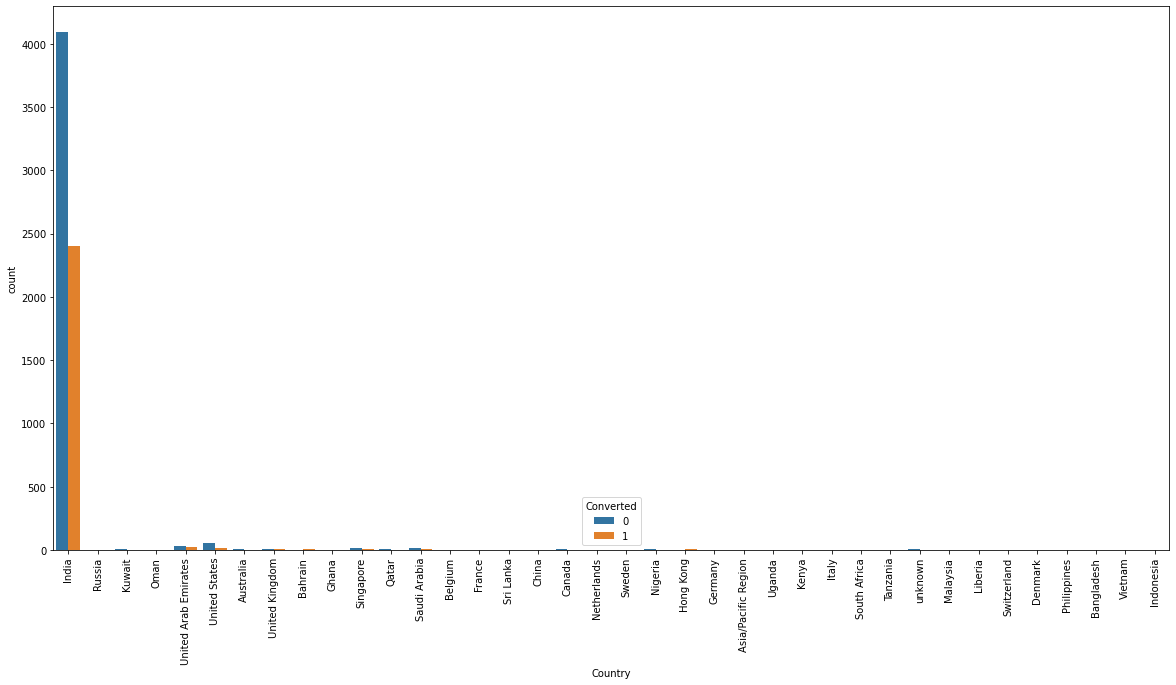

In [19]:
#plotting the spread of Country columnn 
plt.figure(figsize=(20,10))
s1=sns.countplot(LS.Country, hue=LS.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [20]:
LS['Country'] = LS['Country'].replace(np.nan,'India')

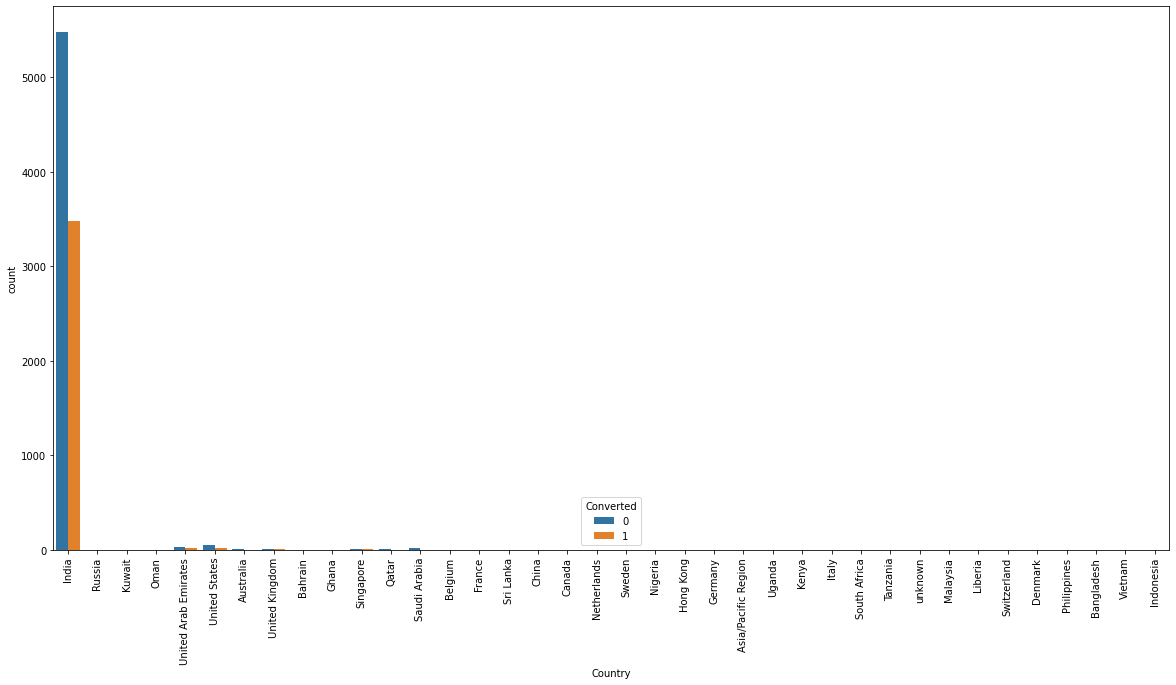

In [21]:
#plotting the spread of Country columnn after replacing NaN values

plt.figure(figsize=(20,10))
s1=sns.countplot(LS.Country, hue=LS.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [22]:
#creating the list of columns to be droppped from "country"

cols_drop=['Country']

In [23]:
#checking the value counts of "City" column

LS['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [24]:
LS['City'] = LS['City'].replace(np.nan,'Mumbai')

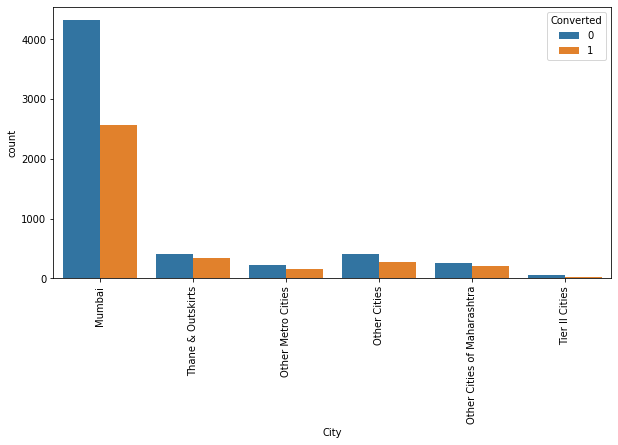

In [25]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(LS.City, hue=LS.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [26]:
#checking value counts of Specialization column

LS['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [27]:
LS['Specialization'] = LS['Specialization'].replace(np.nan, 'Not Specified')

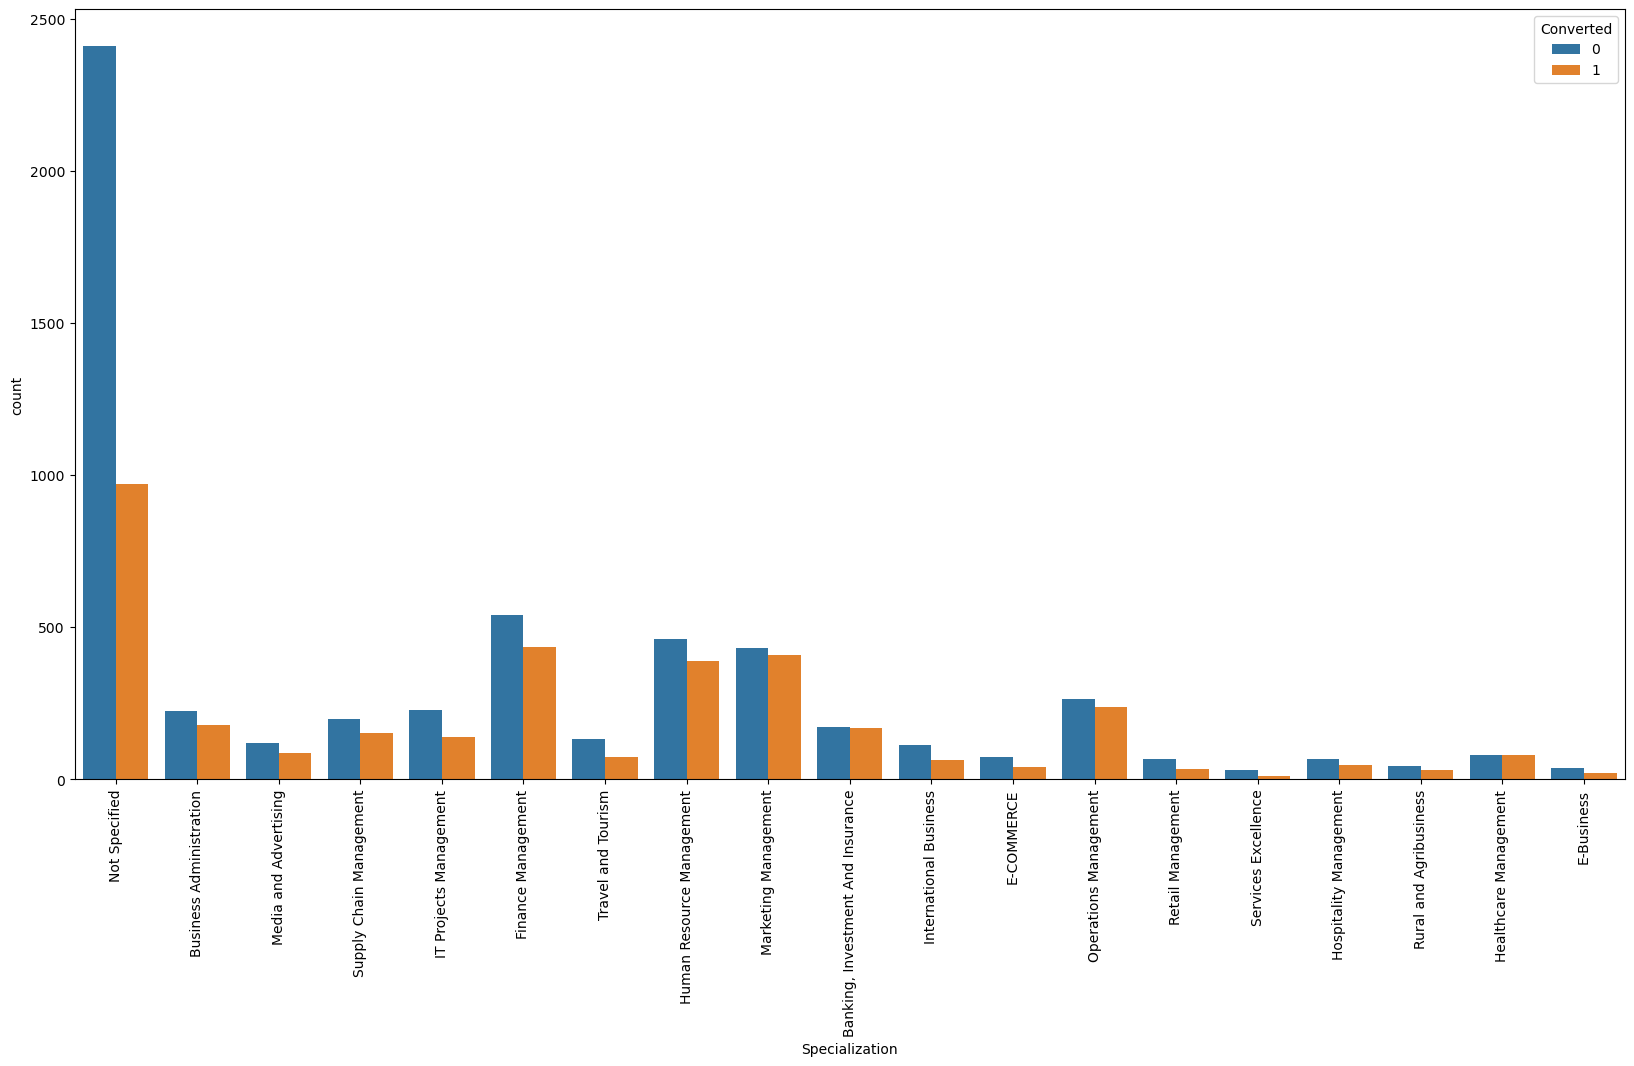

In [ ]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(20,10))
s1=sns.countplot(LS.Specialization, hue=LS.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

We see that specialization with **Management** in them have higher number of leads as well as leads converted.
So this is definitely a significant variable and should not be dropped.

In [28]:
#combining Management Specializations because they show similar trends

LS['Specialization'] = LS['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

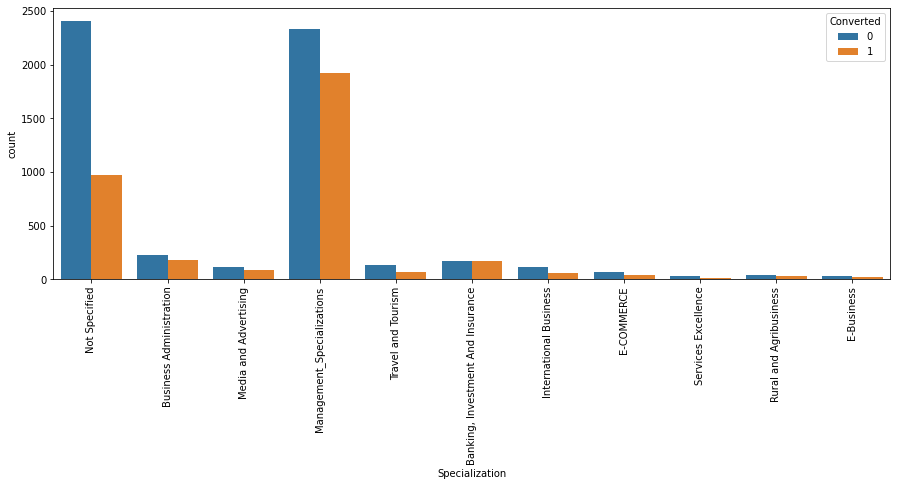

In [29]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(LS.Specialization, hue=LS.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [30]:
#What is your current occupation

LS['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [31]:
#imputing Nan values with mode "Unemployed"

LS['What is your current occupation'] = LS['What is your current occupation'].replace(np.nan, 'Unemployed')

In [32]:
#checking count of values
LS['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

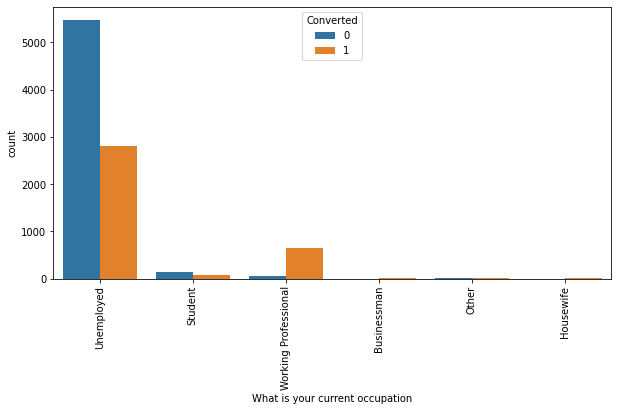

In [33]:
#visualizing the count of Variable based on Converted value

plt.figure(figsize=(10,5))
s1=sns.countplot(LS['What is your current occupation'], hue=LS.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in terms of Absolute numbers.

In [34]:
#checking the value counts

LS['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [35]:
#replacing the Nan values with Mode "Better Career Prospects"

LS['What matters most to you in choosing a course'] = LS['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

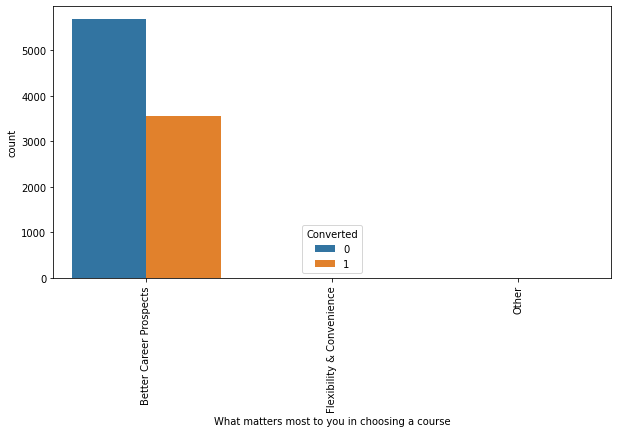

In [36]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(10,5))
s1=sns.countplot(LS['What matters most to you in choosing a course'], hue=LS.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [37]:
#checking the value counts of variable
LS['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [38]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_drop.append('What matters most to you in choosing a course')
cols_drop

['Country', 'What matters most to you in choosing a course']

In [39]:
#checking value counts of Tag variable
LS['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [40]:
#replacing Nan values with "Not Specified"
LS['Tags'] = LS['Tags'].replace(np.nan,'Not Specified')

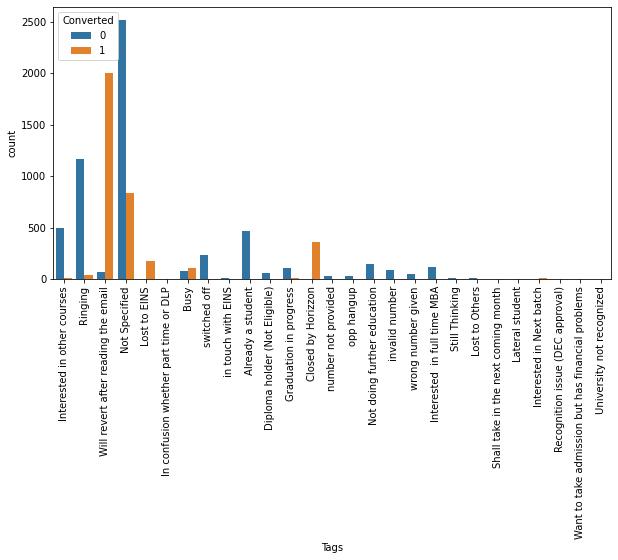

In [41]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(10,5))
s1=sns.countplot(LS['Tags'], hue=LS.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [42]:
#replacing tags with low frequency with "Other Tags"
LS['Tags'] = LS['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

LS['Tags'] = LS['Tags'].replace(['switched off', 'Already a student',
                                       'Not doing further education',
                                       'invalid number','wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [43]:
#checking the percentage of missing values
round(100*(LS.isnull().sum()/len(LS.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [44]:
#checking the value that counts of Lead Source column

LS['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [45]:
#replacing Nan Values and combining low frequency values
LS['Lead Source'] = LS['Lead Source'].replace(np.nan,'Others')
LS['Lead Source'] = LS['Lead Source'].replace('google','Google')
LS['Lead Source'] = LS['Lead Source'].replace('Facebook','Social Media')
LS['Lead Source'] = LS['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home','WeLearn','blog','Pay per Click Ads','testone','NC_EDM'] ,'Others')                                                   

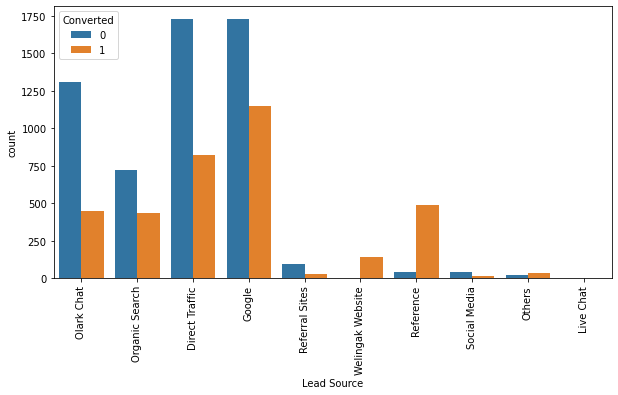

In [46]:
#visualizing the count of Variable based on Converted value

plt.figure(figsize=(10,5))
s1=sns.countplot(LS['Lead Source'], hue=LS.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference:
- Maximum number of leads are generated by Google and Direct traffic.

In [47]:
LS['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [48]:
#replacing the Nan Values and combining low frequency values

LS['Last Activity'] = LS['Last Activity'].replace(np.nan,'Others')
LS['Last Activity'] = LS['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked',       
                                                        'Email Marked Spam','Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [49]:
LS['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [50]:
#Checking the Null Values in All Columns:
round(100*(LS.isnull().sum()/len(LS.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [51]:
#Dropping all the rows which have Nan Values.
LS = LS.dropna()

In [52]:
#Checking the percentage of Null Values in All Columns:
round(100*(LS.isnull().sum()/len(LS.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [53]:
LS['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

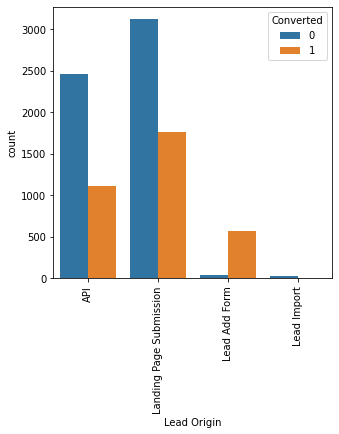

In [54]:
#visualizing the count of Variable based on Converted value

plt.figure(figsize=(5,5))
s1=sns.countplot(LS['Lead Origin'], hue=LS.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference
- API and Landing Page Submission bring higher number of leads as well as conversion.
- Lead Add Form has a very high conversion rate but count of leads are not very high.
- Lead Import and Quick Add Form get very few leads.

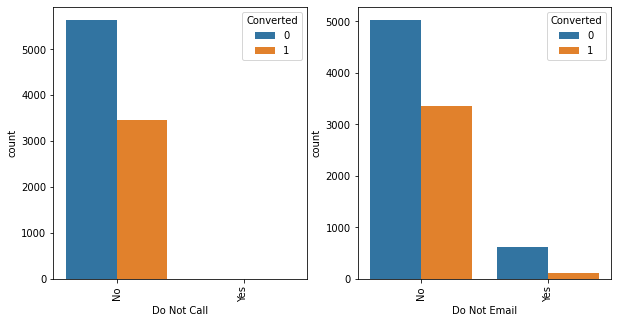

In [55]:
#visualizing the count of Variable based on Converted value

plt.figure(figsize=(10,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(LS['Do Not Call'], hue=LS.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(LS['Do Not Email'], hue=LS.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [56]:
#checking the value counts for Do Not Call
LS['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [57]:
#checking the value counts for Do Not Email
LS['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [58]:
cols_drop.append('Do Not Call')
cols_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [59]:
LS.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [60]:
LS['Magazine'].value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [61]:
LS['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [62]:
LS['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [63]:
LS['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [64]:
LS['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [65]:
LS['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [66]:
LS['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [67]:
LS['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [68]:
LS['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [69]:
LS['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [70]:
LS['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [71]:
#adding the imbalanced columns to the list of columns to be dropped

cols_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [72]:
#checking the value of counts of last Notable Activity
LS['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [73]:
LS['Last Notable Activity'] = LS['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable','Unsubscribed','Email Bounced',                                                                    
                                                                       'Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront','Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

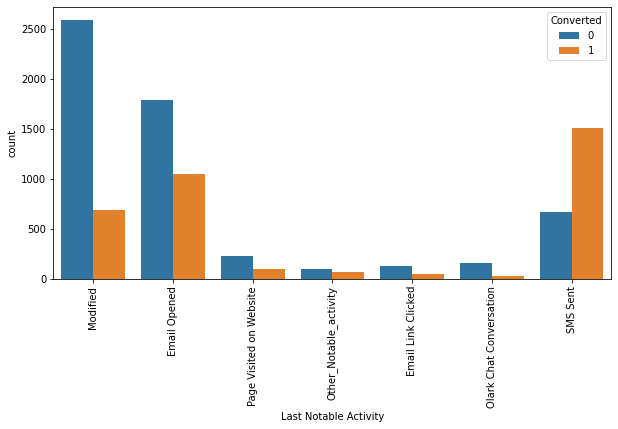

In [74]:
#visualizing the count of Variable based on Converted value

plt.figure(figsize = (10,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = LS)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [75]:
#checking the value counts for variable

LS['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [76]:
cols_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [77]:
#dropping the columns
LS = LS.drop(cols_drop,1)
LS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

#### Numerical  Analysis:

In [78]:
#Checking the percentage% of Data that has Converted Values = 1

Con = (sum(LS['Converted'])/len(LS['Converted'].index))*100
Con

38.02043282434362

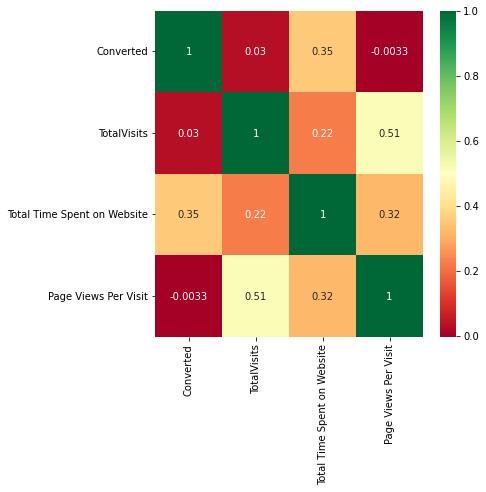

In [79]:
#Checking the correlations of numeric values

plt.figure(figsize=(6,6))
sns.heatmap(LS.corr(), cmap="RdYlGn", annot=True)
plt.show()

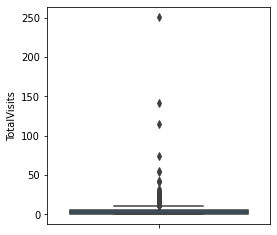

In [80]:
#visualizing the spread of variable

plt.figure(figsize=(4,4))
sns.boxplot(y=LS['TotalVisits'])
plt.show()

We can see presence of outliers here

In [81]:
#checking the percentile of values for "Total Visits"

LS['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

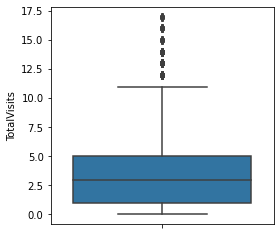

In [82]:
P3 = LS.TotalVisits.quantile(0.99)
LS = LS[(LS.TotalVisits <= P3)]
P1 = LS.TotalVisits.quantile(0.01)
LS = LS[(LS.TotalVisits >= P1)]

plt.figure(figsize=(4,4))
sns.boxplot(y=LS['TotalVisits'])
plt.show()

In [83]:
LS.shape

(9020, 14)

In [84]:
#checking the percentiles for "Total Time Spent on Website"

LS['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

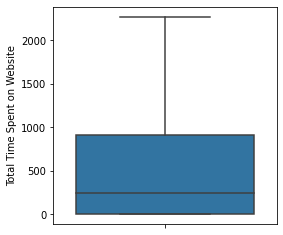

In [85]:
#visualizing spread of numeric variable

plt.figure(figsize=(4,4))
sns.boxplot(y=LS['Total Time Spent on Website'])
plt.show()

In [86]:
#checking the spread of "Page Views Per Visit"

LS['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

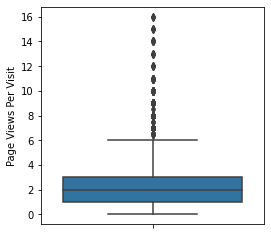

In [87]:
#visualizing the spread of numeric variable

plt.figure(figsize=(4,4))
sns.boxplot(y=LS['Page Views Per Visit'])
plt.show()

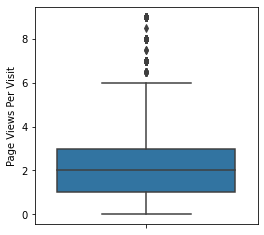

In [88]:
P3 = LS['Page Views Per Visit'].quantile(0.99)
LS = LS[LS['Page Views Per Visit'] <= P3]
P1 = LS['Page Views Per Visit'].quantile(0.01)
LS = LS[LS['Page Views Per Visit'] >= P1]

plt.figure(figsize=(4,4))
sns.boxplot(y=LS['Page Views Per Visit'])
plt.show()

In [89]:
LS.shape

(8953, 14)

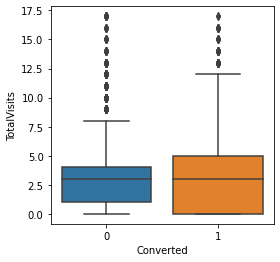

In [90]:
#checking the Spread of "Total Visits" vs Converted variable

plt.figure(figsize=(4,4))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = LS)
plt.show()

Inference
- Median for converted and not converted leads are the close.
- Nothng conclusive can be said on the basis of Total Visits

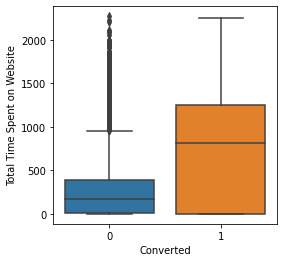

In [91]:
#checking the Spread of "Total Time Spent on Website" vs Converted variable

plt.figure(figsize=(4,4))
sns.boxplot(x=LS.Converted, y=LS['Total Time Spent on Website'])
plt.show()

Inference
- Leads spending more time on the website are more likely to be converted.
- Website should be made more engaging to make leads spend more time.

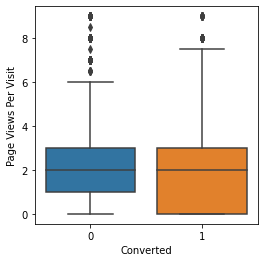

In [92]:
#checking the Spread of "Page Views Per Visit" vs Converted variable

plt.figure(figsize=(4,4))
sns.boxplot(x=LS.Converted,y=LS['Page Views Per Visit'])
plt.show()

Inference
- Median for converted and unconverted leads is the same.
- Nothing can be said specifically for lead conversion from Page Views Per Visit

In [93]:
#checking the missing values in leftover columns

round(100*(LS.isnull().sum()/len(LS.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

There are no missing values in the columns to be analyzed further

### Step 4: Dummy Variable Creation

In [94]:
cat_cols= LS.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [95]:
varlist =  ['A free copy of Mastering The Interview','Do Not Email']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

LS[varlist] = LS[varlist].apply(binary_map)

In [96]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(LS[['Lead Origin','What is your current occupation','City']], drop_first=True)

LS = pd.concat([LS,dummy],1)

In [97]:
dummy = pd.get_dummies(LS['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
LS = pd.concat([LS, dummy], axis = 1)

In [98]:
dummy = pd.get_dummies(LS['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
LS = pd.concat([LS, dummy], axis = 1)

In [99]:
dummy = pd.get_dummies(LS['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
LS = pd.concat([LS, dummy], axis = 1)

In [100]:
dummy = pd.get_dummies(LS['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
LS = pd.concat([LS, dummy], axis = 1)

In [101]:
dummy = pd.get_dummies(LS['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
LS = pd.concat([LS, dummy], axis = 1)

In [102]:
#dropping the original columns after dummy variable creation

LS.drop(cat_cols,1,inplace = True)

In [103]:
LS.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Step 5: Train-Test Split

In [104]:
from sklearn.model_selection import train_test_split


y = LS['Converted']

y.head()

X=LS.drop('Converted', axis=1)

In [105]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 8044 to 1369
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
8044,-0.736830,0.580153,-0.668269,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3169,-0.391658,-0.729871,-0.137309,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3654,-0.046486,-0.406045,0.393651,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6025,3.405235,0.177210,2.252011,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7700,0.298686,-0.234932,0.924611,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


### Step 6: Model Building using Stats Model & RFE:

In [108]:
import statsmodels.api as sm

In [109]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [110]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True])

In [111]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('What is your current occupation_Housewife', False, 28),
 ('What is your current occupation_Other', False, 21),
 ('What is your current occupation_Student', False, 38),
 ('What is your current occupation_Unemployed', False, 5),
 ('What is your current occupation_Working Professional', False, 16),
 ('City_Other Cities', False, 18),
 ('City_Other Cities of Maharashtra', False, 30),
 ('City_Other Metro Cities', False, 37),
 ('City_Thane & Outskirts', False, 33),
 ('City_Tier II Cities', False, 20),
 ('Specialization_Banking, Investment And Insurance', False, 32),
 ('Specialization_Business Administration', False, 41),
 ('Specialization_E-Business', False, 17),
 ('Specialization_E-COMMERCE', False, 13),
 ('Specialization_International Business', Fals

In [112]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [113]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google'

In [114]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1174.8
Date:                Tue, 28 Feb 2023   Deviance:                       2349.7
Time:                        14:15:05   Pearson chi2:                 1.02e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.9338      0.099     -9.437      0.000      -1.128      -0.740
Total Time Spent on Website                       0.9999      0.057     17.449      0.000       0.888       1.112
Lead Origin_Landing Page Submission              -1.1027      0.122     -9.024      0.000      -1.342      -0.863
Lead Origin_Lead Add Form                         1.0895      0.459      2.373      0.018       0.190       1.989
Lead Source_Welingak Website                      4.2167      1.115      3.781      0.000       2.031       6.403
Last Activity_SMS Sent                            1.3440      0.239      5.617      0.000       0.875       1.813
Last Notable Activity_Modified                   -1.3953      0.158     -8.855      0.000      -1.704      -1.086
Last Notable Activity_Olark Chat Conversation    -1.6360      0.487     -3.359      0.001      -2.591      -0.681
Last Notable Activity_SMS Sent                    0.8824      0.273      3.237      0.001       0.348       1.417
Tags_Busy                                         0.8661      0.235      3.688      0.000       0.406       1.326
Tags_Closed by Horizzon                          27.3989   1.37e+04      0.002      0.998   -2.68e+04    2.69e+04
Tags_Interested in other courses                 -1.9054      0.376     -5.069      0.000      -2.642      -1.169
Tags_Lost to EINS                                 6.0813      0.608     10.001      0.000       4.890       7.273
Tags_Other_Tags                                  -2.6830      0.248    -10.818      0.000      -3.169      -2.197
Tags_Ringing                                     -3.4137      0.250    -13.666      0.000      -3.903      -2.924
Tags_Will revert after reading the email          4.5751      0.188     24.335      0.000       4.207       4.944
=================================================================================================================
"""

p-value of variable Tags_Closed by Horizzonis high, so we can drop it.

In [115]:
#dropping column with high p-value

col = col.drop('Tags_Closed by Horizzon',1)

In [116]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1390.9
Date:                Tue, 28 Feb 2023   Deviance:                       2781.7
Time:                        14:17:19   Pearson chi2:                 1.22e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8157      0.094     -8.654      0.000      -1.000      -0.631
Total Time Spent on Website                       1.0631      0.054     19.847      0.000       0.958       1.168
Lead Origin_Landing Page Submission              -0.7137      0.109     -6.519      0.000      -0.928      -0.499
Lead Origin_Lead Add Form                         3.7868      0.292     12.991      0.000       3.216       4.358
Lead Source_Welingak Website                      1.9011      1.053      1.805      0.071      -0.164       3.966
Last Activity_SMS Sent                            0.5673      0.209      2.717      0.007       0.158       0.977
Last Notable Activity_Modified                   -0.7888      0.125     -6.312      0.000      -1.034      -0.544
Last Notable Activity_Olark Chat Conversation    -1.6463      0.458     -3.593      0.000      -2.544      -0.748
Last Notable Activity_SMS Sent                    1.4383      0.247      5.819      0.000       0.954       1.923
Tags_Busy                                         0.4913      0.230      2.137      0.033       0.041       0.942
Tags_Interested in other courses                 -2.4858      0.367     -6.772      0.000      -3.205      -1.766
Tags_Lost to EINS                                 5.2710      0.600      8.783      0.000       4.095       6.447
Tags_Other_Tags                                  -3.0891      0.243    -12.707      0.000      -3.566      -2.613
Tags_Ringing                                     -3.9726      0.262    -15.149      0.000      -4.487      -3.459
Tags_Will revert after reading the email          3.9591      0.174     22.689      0.000       3.617       4.301
=================================================================================================================
"""

In [117]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.22
4,Last Activity_SMS Sent,6.17
1,Lead Origin_Landing Page Submission,2.07
13,Tags_Will revert after reading the email,1.72
5,Last Notable Activity_Modified,1.71
2,Lead Origin_Lead Add Form,1.59
11,Tags_Other_Tags,1.33
3,Lead Source_Welingak Website,1.30
12,Tags_Ringing,1.30
0,Total Time Spent on Website,1.24


There is a high correlation between two variables so we drop the variable with the higher valued VIF value

In [119]:
#dropping variable with high VIF

col = col.drop('Last Notable Activity_SMS Sent',1)

In [120]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1408.5
Date:                Tue, 28 Feb 2023   Deviance:                       2817.1
Time:                        14:17:38   Pearson chi2:                 1.12e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6657      0.089     -7.497      0.000      -0.840      -0.492
Total Time Spent on Website                       1.0550      0.053     19.838      0.000       0.951       1.159
Lead Origin_Landing Page Submission              -0.7644      0.108     -7.070      0.000      -0.976      -0.553
Lead Origin_Lead Add Form                         3.7898      0.292     12.995      0.000       3.218       4.361
Lead Source_Welingak Website                      1.7851      1.055      1.692      0.091      -0.283       3.853
Last Activity_SMS Sent                            1.5864      0.109     14.530      0.000       1.372       1.800
Last Notable Activity_Modified                   -1.1830      0.109    -10.898      0.000      -1.396      -0.970
Last Notable Activity_Olark Chat Conversation    -1.7983      0.457     -3.933      0.000      -2.694      -0.902
Tags_Busy                                         0.5467      0.224      2.445      0.014       0.108       0.985
Tags_Interested in other courses                 -2.4318      0.368     -6.607      0.000      -3.153      -1.710
Tags_Lost to EINS                                 5.3953      0.603      8.951      0.000       4.214       6.577
Tags_Other_Tags                                  -2.9983      0.239    -12.520      0.000      -3.468      -2.529
Tags_Ringing                                     -3.7904      0.255    -14.840      0.000      -4.291      -3.290
Tags_Will revert after reading the email          3.9899      0.176     22.715      0.000       3.646       4.334
=================================================================================================================
"""

In [121]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.07
12,Tags_Will revert after reading the email,1.67
2,Lead Origin_Lead Add Form,1.59
4,Last Activity_SMS Sent,1.55
5,Last Notable Activity_Modified,1.42
10,Tags_Other_Tags,1.32
3,Lead Source_Welingak Website,1.30
11,Tags_Ringing,1.28
0,Total Time Spent on Website,1.24
8,Tags_Interested in other courses,1.13


In [122]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8044    0.999910
3169    0.099731
3654    0.002376
6025    0.081198
7700    0.004200
4560    0.234284
6688    0.022073
1659    0.007926
542     0.001291
7236    0.996809
dtype: float64

In [123]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99990972, 0.09973139, 0.00237627, 0.08119787, 0.00420031,
       0.23428404, 0.02207287, 0.00792561, 0.0012906 , 0.99680947])

In [124]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.999910,8044
1,0,0.099731,3169
2,0,0.002376,3654
3,0,0.081198,6025
4,0,0.004200,7700


In [125]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.999910,8044,1
1,0,0.099731,3169,0
2,0,0.002376,3654,0
3,0,0.081198,6025,0
4,0,0.004200,7700,0


In [126]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3693  187]
 [ 382 2005]]


In [127]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9092069570767513


In [128]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8399664851277755

In [130]:
# Let us calculate specificity
TN / float(TN+FP)

0.9518041237113402

In [131]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.048195876288659796


In [132]:
# positive predictive value 
print (TP / float(TP+FP))

0.9146897810218978


In [133]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9062576687116565


### PLOTTING ROC CURVE

In [134]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [135]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

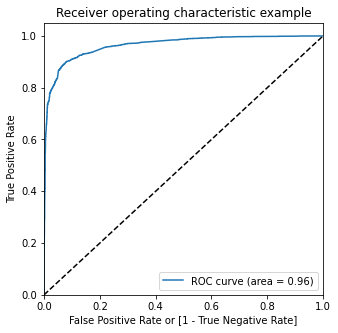

In [136]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.96 indicating a good predictive model.

### Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that: 

In [137]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.999910,8044,1,1,1,1,1,1,1,1,1,1,1
1,0,0.099731,3169,0,1,0,0,0,0,0,0,0,0,0
2,0,0.002376,3654,0,1,0,0,0,0,0,0,0,0,0
3,0,0.081198,6025,0,1,0,0,0,0,0,0,0,0,0
4,0,0.004200,7700,0,1,0,0,0,0,0,0,0,0,0


In [138]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380884  1.000000  0.000000
0.1   0.1  0.802457  0.970674  0.698969
0.2   0.2  0.884793  0.930876  0.856443
0.3   0.3  0.906335  0.905320  0.906959
0.4   0.4  0.915430  0.886887  0.932990
0.5   0.5  0.909207  0.839966  0.951804
0.6   0.6  0.905856  0.811060  0.964175
0.7   0.7  0.904101  0.787599  0.975773
0.8   0.8  0.892293  0.740260  0.985825
0.9   0.9  0.871869  0.679095  0.990464


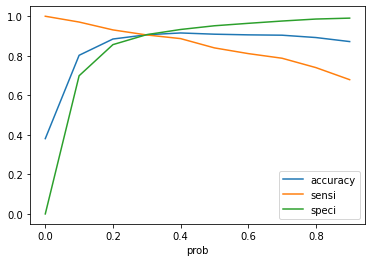

In [139]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [140]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.999910,8044,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.099731,3169,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.002376,3654,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.081198,6025,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.004200,7700,0,1,0,0,0,0,0,0,0,0,0,0


In [141]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.999910,8044,1,100
1,0,0.099731,3169,0,10
2,0,0.002376,3654,0,0
3,0,0.081198,6025,0,8
4,0,0.004200,7700,0,0


In [142]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9063347694271582

In [143]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3519,  361],
       [ 226, 2161]])

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9053204859656473

In [146]:
# Let us calculate specificity
TN / float(TN+FP)

0.9069587628865979

### Observation:
We can see above the model seems to be performing well. The ROC curve has a value of 0.96, which is very good. We have the following values for the Train Data:
- Accuracy : 90.63%
- Sensitivity : 90.53%
- Specificity : 90.69%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall. 

In [147]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.09304123711340206


In [148]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8568596352101506


In [149]:
# Negative predictive value
print (TN / float(TN+ FN))

0.939652870493992


In [150]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3519,  361],
       [ 226, 2161]])

In [151]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8568596352101506

In [152]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9053204859656473

In [153]:
from sklearn.metrics import precision_score, recall_score

In [154]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8568596352101506

In [155]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9053204859656473

In [156]:
from sklearn.metrics import precision_recall_curve

In [157]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

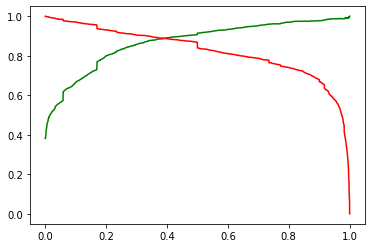

In [158]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [159]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
8430,-1.083588,-0.888671,-1.189398,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6194,-1.083588,-0.888671,-1.189398,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
83,-1.083588,-0.888671,-1.189398,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
884,1.999951,1.030337,3.493040,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
563,-0.740973,0.207382,-0.669127,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [160]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Busy,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
8430,-0.888671,0,0,0,0,1,0,0,0,0,0,0,0
6194,-0.888671,0,0,0,0,0,1,0,0,0,0,0,0
83,-0.888671,0,0,0,0,1,0,0,0,0,0,0,0
884,1.030337,1,0,0,0,0,0,0,0,0,0,0,1
563,0.207382,1,0,0,0,1,0,1,0,0,0,0,0


In [161]:
X_test_sm = sm.add_constant(X_test)

### PREDICTIONS ON TEST SET

In [162]:
y_test_pred = res.predict(X_test_sm)

In [163]:
y_test_pred[:10]

8430    0.058071
6194    0.032247
83      0.058071
884     0.974588
563     0.136146
6774    0.994999
8472    0.507831
146     0.103187
5728    0.167521
8452    0.971100
dtype: float64

In [164]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [165]:
# Let's see the head
y_pred_1.head()

,0
8430,0.058071
6194,0.032247
83,0.058071
884,0.974588
563,0.136146


In [166]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [167]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [168]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [169]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [170]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8430,0.058071
1,0,6194,0.032247
2,0,83,0.058071
3,1,884,0.974588
4,1,563,0.136146


In [171]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [172]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,8430,0.058071
1,0,6194,0.032247
2,0,83,0.058071
3,1,884,0.974588
4,1,563,0.136146


In [173]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [174]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,8430,0,0.058071,6
1,6194,0,0.032247,3
2,83,0,0.058071,6
3,884,1,0.974588,97
4,563,1,0.136146,14


In [175]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [176]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,8430,0,0.058071,6,0
1,6194,0,0.032247,3,0
2,83,0,0.058071,6,0
3,884,1,0.974588,97,1
4,563,1,0.136146,14,0


In [177]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9028294862248697

In [178]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1521,  157],
       [ 104,  904]])

In [179]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [180]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8968253968253969

In [181]:
# Let us calculate specificity
TN / float(TN+FP)

0.9064362336114422

In [182]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8520263901979265

In [183]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8968253968253969

### Observation:
After running the model on the Test Data these are the figures we obtain:
- Accuracy : 90.28%
- Sensitivity : 89.68%
- Specificity : 90.64%

## Final Observation:

Let us compare the values obtained for Train & Test:

### <u> Train Data: </u>
- Accuracy : 90.63%
- Sensitivity : 90.53%
- Specificity : 90.69%

### <u> Test Data: </u>
- Accuracy : 90.28%
- Sensitivity : 89.68%
- Specificity : 90.64%